<h4 style="text-align: right;">ФБ-23 Качмар Михайло</h4>
<h1 style="text-align: center;"><b>Лабораторна робота №2</b></h1>
<h3 style="text-align: center;">Засоби підготовки та аналізу даних</h3>
<h5 style="text-aligleftter;"><b>Хід робот</
h5>


In [1]:
import os
import datetime
import pandas as pd
import urllib.request

print("Setup Complete")

Setup Complete


<p>1. Для кожної із адміністративних одиниць України завантажити тестові структуровані файли, що містять значення VHI-індексу.</p>
<p>2. Ця процедура має бути автоматизована, параметром процедури має бути індекс (номер) області.</p>
<p>3. При зберіганні файлу до його імені потрібно додати дату та час завантаження;</p>

In [2]:
def download_data(region_id, start_year=1981, end_year=2024):
    if not os.path.exists("data_VHI"):
        os.makedirs("data_VHI")
    
    filename_pattern = f"VHI-ID_{region_id}_"
    existing_files = [file for file in os.listdir("data_VHI") if file.startswith(filename_pattern)]
    if existing_files:
        print(f"Файл для VHI-ID №{region_id} вже завантажено: {existing_files[0]}\n")
        return
    
    download_url = f"https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={region_id}&year1={start_year}&year2={end_year}&type=Mean"
    vhi_url_open = urllib.request.urlopen(download_url)
    
    current_date = datetime.datetime.now().strftime("%d-%m-%Y")
    current_time = datetime.datetime.now().strftime("%H-%M-%S")
    filename = f"VHI-ID_{region_id}_{current_date}_{current_time}.csv"
    
    file_path = os.path.join("data_VHI", filename)
    with open(file_path, 'wb') as output:
        output.write(vhi_url_open.read())

    print()
    print(f"VHI-файл {filename} успішно завантажено!")
    print(f"Файл збережено у: {os.path.abspath(file_path)}")
    print()

    return

for index in range(1, 28):
    print(f"Завантаження CSV-файлу для VHI-ID №{index}...")
    download_data(index, 1981, 2024)

Завантаження CSV-файлу для VHI-ID №1...
Файл для VHI-ID №1 вже завантажено: VHI-ID_1_01-06-2024_08-06-49.csv

Завантаження CSV-файлу для VHI-ID №2...
Файл для VHI-ID №2 вже завантажено: VHI-ID_2_01-06-2024_08-06-53.csv

Завантаження CSV-файлу для VHI-ID №3...
Файл для VHI-ID №3 вже завантажено: VHI-ID_3_01-06-2024_08-06-54.csv

Завантаження CSV-файлу для VHI-ID №4...
Файл для VHI-ID №4 вже завантажено: VHI-ID_4_01-06-2024_08-06-55.csv

Завантаження CSV-файлу для VHI-ID №5...
Файл для VHI-ID №5 вже завантажено: VHI-ID_5_01-06-2024_08-06-56.csv

Завантаження CSV-файлу для VHI-ID №6...
Файл для VHI-ID №6 вже завантажено: VHI-ID_6_01-06-2024_08-06-57.csv

Завантаження CSV-файлу для VHI-ID №7...
Файл для VHI-ID №7 вже завантажено: VHI-ID_7_01-06-2024_08-06-58.csv

Завантаження CSV-файлу для VHI-ID №8...
Файл для VHI-ID №8 вже завантажено: VHI-ID_8_01-06-2024_08-06-59.csv

Завантаження CSV-файлу для VHI-ID №9...
Файл для VHI-ID №9 вже завантажено: VHI-ID_9_01-06-2024_08-07-01.csv

Завантажен

1) Зчитати завантажені текстові файли у фрейм. 
2) Імена стовбців фрейму мають бути змістовними та легкими для сприйняття (не повинно бути спеціалізованих символів, пробілів тощо). 
3) Ця задача має бути реалізована у вигляді окремої процедури, яка на вхід приймає шлях до директорії, в якій зберігаються файли;

In [3]:
def create_dataframe(folder_path):
    frames, columns  = [], ["Year", "Week", "SMN", "SMT", "VCI", "TCI", "VHI", "empty"]

    csv_files = filter(lambda x: x.endswith('.csv'), os.listdir(folder_path))

    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        region_id = int(file_name.split('_')[1])
        
        df = pd.read_csv(file_path, header=1, names=columns)
        df.at[0, "Year"] = df.at[0, "Year"][9:]

        df = df.drop(df.index[-1])
        df = df.drop(df.loc[df["VHI"] == -1].index)
        df = df.drop("empty", axis=1)

        df.insert(0, "region_id", region_id, True)
        df['Year'] = df['Year'].astype(int)
        df["Week"] = df["Week"].astype(int)

        frames.append(df)

    df_result = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    df_result = df_result.loc[(df_result.region_id != 12) & (df_result.region_id != 20)]

    return df_result

folder_path = "data_VHI"
data_frame = create_dataframe(folder_path)
print(data_frame)

       region_id  Year  Week    SMN     SMT    VCI    TCI    VHI
0             10  1982     1  0.059  258.24  51.11  48.78  49.95
1             10  1982     2  0.063  261.53  55.89  38.20  47.04
2             10  1982     3  0.063  263.45  57.30  32.69  44.99
3             10  1982     4  0.061  265.10  53.96  28.62  41.29
4             10  1982     5  0.058  266.42  46.87  28.57  37.72
...          ...   ...   ...    ...     ...    ...    ...    ...
58180          9  2024    17  0.305  297.97  70.10  16.63  43.40
58181          9  2024    18  0.321  298.97  68.55  24.34  46.47
58182          9  2024    19  0.333  299.93  65.69  30.41  48.08
58183          9  2024    20  0.339  300.65  62.39  34.66  48.56
58184          9  2024    21  0.342  301.42  60.67  34.88  47.79

[53875 rows x 8 columns]


<p><b> Реалізувати процедуру, яка змінить індекси областей, які використані на порталі NOAA на наступні: </b></p>
<p> | № області | Назва | </p>
<p> ----------------------- </p>
<p> |....................... | ............. | </p>

<p><b> Реалізувати процедури для формування вибірок наступного виду (включаючи елементи аналізу): </b></p>
<p>1. Ряд VHI для області за рік, пошук екстремумів (min та max);</p>

In [4]:
def calculate_vhi_extremes(df, start_year=None, end_year=None):

    if start_year is not None:
        df = df[df['Year'] >= start_year]
    if end_year is not None:
        df = df[df['Year'] <= end_year]

    grouped_data = df.groupby(['region_id', 'Year'])

    vhi_extremes = []

    for (region_id, year), group_df in grouped_data:
        min_vhi = group_df['VHI'].min()
        max_vhi = group_df['VHI'].max()

        vhi_extremes.append({'region_id': region_id, 'Year': year, 'Min_VHI': min_vhi, 'Max_VHI': max_vhi})

    result_df = pd.DataFrame(vhi_extremes)

    return result_df

vhi_extremes_df = calculate_vhi_extremes(data_frame, start_year=2005, end_year=2024)
print(vhi_extremes_df)  

     region_id  Year  Min_VHI  Max_VHI
0            1  2005    41.62    68.89
1            1  2006    35.84    66.33
2            1  2007    26.46    52.82
3            1  2008    25.87    74.45
4            1  2009    36.76    62.66
..         ...   ...      ...      ...
495         27  2020    35.05    58.33
496         27  2021    36.11    65.33
497         27  2022    30.36    63.81
498         27  2023    32.92    64.08
499         27  2024    42.30    51.75

[500 rows x 4 columns]


<p><b> Реалізувати процедури для формування вибірок наступного виду (включаючи елементи аналізу): </b></p>
<p> 2. Ряд VHI за всі роки для області, виявити роки з екстремальними посухами, які торкнулися більше вказаного відсотка областей; </p>
<p> 3. Аналогічно для помірних посух </p>

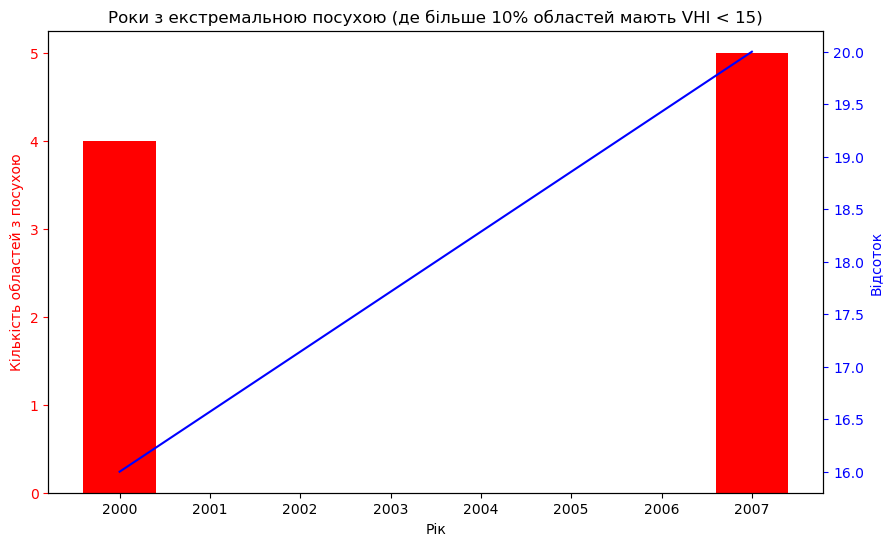

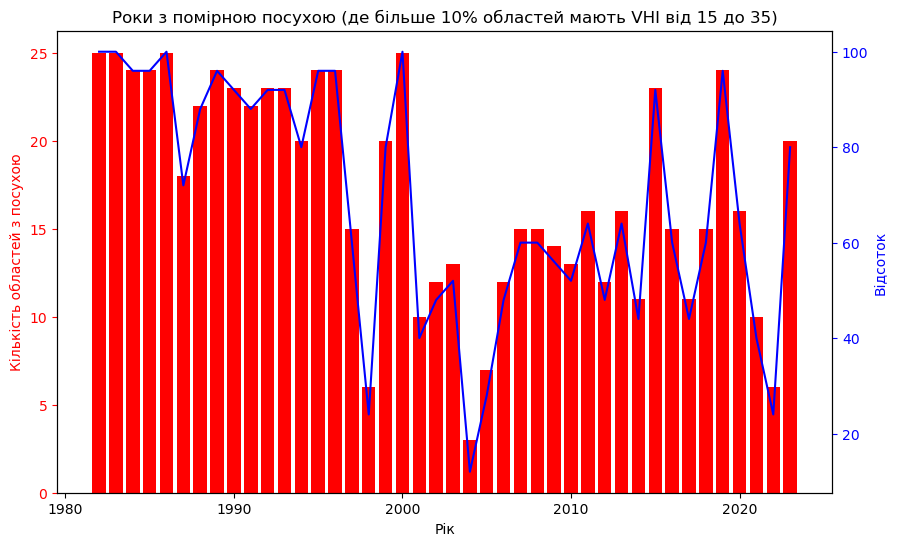

In [5]:
import matplotlib.pyplot as plt

def drought_years(df, percentage, drought_type, start_year=None, end_year=None):
    if start_year is not None:
        df = df[df['Year'] >= start_year]
    if end_year is not None:
        df = df[df['Year'] <= end_year]

    drought_count = {}

    grouped_data = df.groupby('Year')

    for year, group_df in grouped_data:
        total_areas = len(group_df['region_id'].unique())

        if drought_type == "extreme":
            drought_areas = group_df[group_df['VHI'] < 15]['region_id'].nunique()
        elif drought_type == "moderate":
            drought_areas = group_df[(group_df['VHI'] > 15) & (group_df['VHI'] < 35)]['region_id'].nunique()
        
        if drought_areas / total_areas > percentage / 100:
            drought_count[year] = (drought_areas, round((drought_areas / total_areas) * 100, 2))

    years = list(drought_count.keys())
    drought_areas = [values[0] for values in drought_count.values()]
    percentages = [values[1] for values in drought_count.values()]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    if drought_type == "extreme":
        ax1.set_title(f"Роки з екстремальною посухою (де більше {percentage}% областей мають VHI < 15)")
    elif drought_type == "moderate":
        ax1.set_title(f"Роки з помірною посухою (де більше {percentage}% областей мають VHI від 15 до 35)")

    ax1.bar(years, drought_areas, color='r')
    ax1.set_xlabel('Рік')
    ax1.set_ylabel('Кількість областей з посухою', color='r')
    ax1.tick_params('y', colors='r')

    ax2 = ax1.twinx()
    ax2.plot(years, percentages, 'b-')
    ax2.set_ylabel('Відсоток', color='b')
    ax2.tick_params('y', colors='b')

    plt.show()

drought_years_extreme = drought_years(data_frame, 10, "extreme", start_year=1982, end_year=2024)
drought_years_moderate = drought_years(data_frame, 10, "moderate", start_year=1982, end_year=2024)